In [1]:
import importlib
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import pearsonr, spearmanr

import pyBigWig
import pysam

from Modules import utils, plot_utils

Useful global variables

In [2]:
importlib.reload(utils)
importlib.reload(plot_utils)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
# plt.rcParams.update({'axes.labelsize': 16})
with open("/home/alex/shared_folder/Human/T2T-CHM13v2.0_NCBI2UCSC.txt") as f:
    T2T_to_ucsc = dict(line.split() for line in f.readlines())

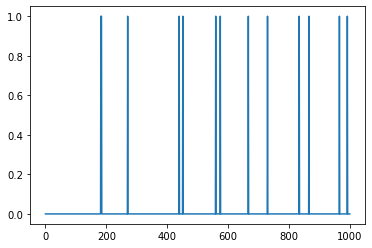

In [3]:
bwfile = "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_paired_T2T_mid_points.bw"
start = 0
stop = 1000
with pyBigWig.open(bwfile) as bw:
    signal = bw.values("NC_060925.1", 0, -1, numpy=True)
plt.plot(np.arange(start, stop), signal[start:stop])

Compute quantiles ans sums

In [3]:
bwfiles = {
    # "Ctrl": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T.bw",
    # "IP1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T.bw",
    # "IP2": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T.bw",
    # "Ctrl_pp1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T_properonce.bw",
    # "IP1_pp1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T_properonce.bw",
    # "IP2_pp1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T_properonce.bw",
    # "Ctrl_pp1_mm3": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T_properonce_minmapq3.bw",
    # "IP1_pp1_mm3": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T_properonce_minmapq3.bw",
    # "IP2_pp1_mm3": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T_properonce_minmapq3.bw",
    # "167_2020": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170_CPM.bw",
    # "197a_2020": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170_CPM.bw",
    # "197b_2020": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2020_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2020_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170_CPM.bw",
    # "167_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "167_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197a_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197a_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197b_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197b_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-170_CPM.bw",
}

In [4]:
# Compute quantiles and sums
q_list = np.array([0.9, 0.95, 0.99, 0.999])
quantiles = {}
sums = {}
clipped_sums = {}
for file_id, bwfile in bwfiles.items():
    signals = utils.load_bw(bwfile, nantonum=False)
    full = np.concatenate(list(signals.values()))
    quantiles[bwfile] = np.quantile(full, q_list)
    sums[bwfile] = sum(np.sum(v) for v in signals.values())
    q99 = quantiles[bwfile][np.where(q_list == 0.99)]
    clipped_sums[bwfile] = sum(
        np.sum(np.clip(v, a_min=None, a_max=q99)) for v in signals.values()
    )
# Save quantiles
quantiles = pd.DataFrame(quantiles, index=[f"quantile_{q}" for q in q_list]).T
quant_filename = utils.safe_filename(
    "/home/alex/shared_folder/JB_seqdes/Projet_Julien/quantiles_mnase_v3.csv"
)
quantiles.to_csv(quant_filename)
print(quantiles)
# Save sums
df_sums = pd.DataFrame(sums, index=["Total_counts"], columns=sums.keys()).T
df_sums["Clip_q0.99_total_counts"] = clipped_sums.values()
df_sums = df_sums.astype(int)
sums_filename = utils.safe_filename(
    "/home/alex/shared_folder/JB_seqdes/Projet_Julien/sums_mnase_v3.csv"
)
df_sums.to_csv(sums_filename)
df_sums

Building parent directories
                                                    quantile_0.9  \
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     24.083500   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.399200   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     20.277300   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.061300   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     14.650700   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     24.675100   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     24.659700   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     20.208700   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.612000   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     22.214001   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     21.867201   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     21.016100   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.576799   

                   

,Total_counts,Clip_q0.99_total_counts
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170_CPM.bw,143227519,97099815
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170_CPM.bw,155930014,149487376
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170_CPM.bw,156661848,149503900
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170_CPM.bw,140108375,95070965
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170_CPM.bw,133967415,90932126
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170_CPM.bw,150634188,142569793
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170_CPM.bw,151880449,144018331
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170_CPM.bw,152833859,148244860
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170_CPM.bw,153391649,148789898
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170_CPM.bw,154414527,148243269


In [4]:
# Compute quantiles
q_list = [0.9, 0.95, 0.99, 0.999]
quantiles = {}
for file_id, bwfile in bwfiles.items():
    signals = utils.load_bw(bwfile, nantonum=False)
    full = np.concatenate(list(signals.values()))
    quantiles[bwfile] = np.quantile(full, q_list)
quantiles = pd.DataFrame(quantiles, index=[f"quantile_{q}" for q in q_list]).T
filename = utils.safe_filename(
    "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/quantiles_run2.csv"
)
quantiles.to_csv(filename)
quantiles

In [6]:
# Compute sum, and thresholded to 99e centile sum
sums = {}
clipped_sums = {}
for file_id, bwfile in bwfiles.items():
    filesum = 0
    clipped_filesum = 0
    with pyBigWig.open(bwfile) as bw:
        for chr_id in bw.chroms():
            values = bw.values(chr_id, 0, -1, numpy=True)
            filesum += np.sum(values)
            np.clip(
                values,
                a_min=None,
                a_max=quantiles.loc[bwfile, "quantile_0.99"],
                out=values,
            )
            clipped_filesum += np.sum(values)
    sums[bwfile] = filesum
    clipped_sums[bwfile] = clipped_filesum
df = pd.DataFrame(sums, index=["Total_counts"], columns=sums.keys()).T
df["Clip_q0.99_total_counts"] = clipped_sums.values()
df = df.astype(int)
filename = utils.safe_filename(
    "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/sums_run2.csv"
)
df.to_csv(filename)
df

,Total_counts,Clip_q0.99_total_counts
/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T.bw,20967397902,20801592514
/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T.bw,26920413596,26608732992
/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T.bw,249342779072,246931352992


In [21]:
from saturation_analysis import make_barplot

In [23]:
df = pd.read_csv(
    "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/saturation_analysis/saturation_IP2_vs_INPUT_powersof10.csv",
    index_col=[0, 1],
)
df

IP  IP_clust  Undetermined     Ctrl  Ctrl_clust  total_cov
100      0.001       0         0      31172718       48          45     505495
         0.010       1         1      31168905     3860        3781    5054947
         0.100     134       122      30918700   253932      251381   50549464
         1.000  282898    275661      28772250  2117618     1935985  505494633
1000     0.001       0         0       3116936      351         344     505495
         0.010       5         5       3093707    23575       23371    5054947
         0.100    3450      3348       3007082   106755      102020   50549464
         1.000  307943    240897       2457703   351641      289362  505494633
10000    0.001       0         0        309371     2368        2346     505495
         0.010     194       190        302179     9366        9033    5054947
         0.100   22438     17904        265854    23447       20664   50549464
         1.000   74247     18352        150672    86820       44070  505494633
100000   0.001      16        16         30244      925         889     505495
         0.010    2119      1751         26946     2120        1891    5054947
         0.100    6985      1463         16309     7891        4441   50549464
         1.000    9313      1112          4912    16960        2475  505494633
1000000  0.001     182       165          2767      183         170     505495
         0.010     663       303          1794      675         445    5054947
         0.100     948       312           470     1714         373   50549464
         1.000    1054       322           140     1938         317  505494633
10000000 0.001      42        32           250       35          28     505495
         0.010     103        55            95      129          48    5054947
         0.100     129        53            32      166          47   50549464
         1.000     142        50            12      173          47  505494633

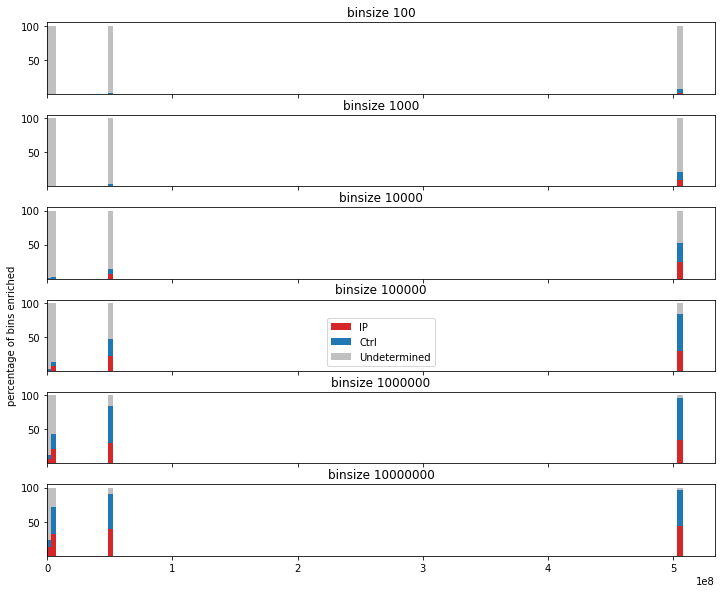

In [24]:
fig = make_barplot(df, log_scale=False)
fig.show()

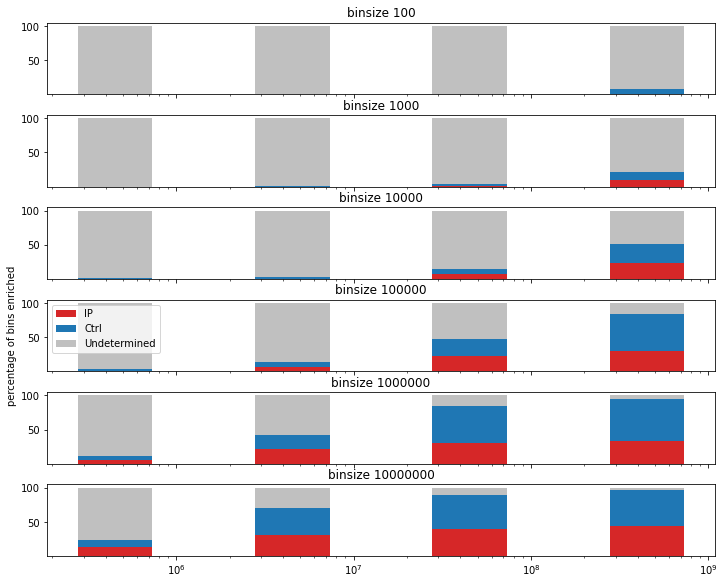

In [25]:
fig = make_barplot(df, log_scale=True)
fig.show()